In [ ]:
# !pip install jupyterthemes
# !pip install --upgrade jupyterthemes
# !jt -t chesterish

### Importing necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import emoji
import re
import datetime

In [2]:
## Set display options
pd.set_option('display.max_colwidth',75)
pd.set_option('display.max_rows', 50)
pd.set_option('display.min_rows', 20)

### Read chat data file

In [3]:
file_loc = 'Dataset/WhatsApp Chat with IIM IPBA-4 Students Group.txt'

df = pd.read_csv(file_loc, delimiter='\t', header=None, names=['text'])

In [4]:
df.head()

,text
0,"2/26/20, 14:46 - Messages and calls are end-to-end encrypted. No one ou..."
1,"2/8/20, 10:57 - Babi IPBA created group ""IIM IPBA-4 Students Group"""
2,"2/26/20, 14:46 - Babi IPBA added you"
3,"2/26/20, 14:47 - Babi IPBA: Mazhar, Susandeep - welcome to students group"
4,"2/26/20, 14:50 - Mazhar: Hello Everyone"


**Abstracted away a lot of code for cleaning**

In [5]:
from utils import clean_df
df = clean_df(df)

Succesfully cleaned dataframe
Rows before cleaning: 9343
Rows after cleaning: 8445


In [6]:
df.head()

,Text,Sender,datetime
0,Messages and calls are end-to-end encrypted. No one outside of this cha...,Notification,2020-02-26 14:46:00
1,"Babi IPBA created group ""IIM IPBA-4 Students Group""",Notification,2020-02-08 10:57:00
2,Babi IPBA added you,Notification,2020-02-26 14:46:00
3,"Mazhar, Susandeep - welcome to students group",Babi,2020-02-26 14:47:00
4,Hello Everyone,Mazhar,2020-02-26 14:50:00


Dropping the rows with `Notification` as the `Sender`

In [7]:
df.drop(df[df.Sender=='Notification'].index, axis=0, inplace=True)

Convert `datetime` column into separte columns for `day`, `hour`, `month`

In [8]:
# Create new fields for day, hour, month
df['day_of_week'] = df['datetime'].dt.dayofweek + 1
df['hour_of_day'] = df['datetime'].dt.hour
df['month_of_year'] = df['datetime'].dt.month

df.drop('datetime', axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

In [9]:
df.head()

,Text,Sender,day_of_week,hour_of_day,month_of_year
0,"Mazhar, Susandeep - welcome to students group",Babi,3,14,2
1,Hello Everyone,Mazhar,3,14,2
2,"Are there any important updates if any, am I missing?",Mazhar,3,14,2
3,Hi Babi,Susandeep,3,15,2
4,I believe another group is also created for same,Susandeep,3,15,2


### Activity on the group over the months

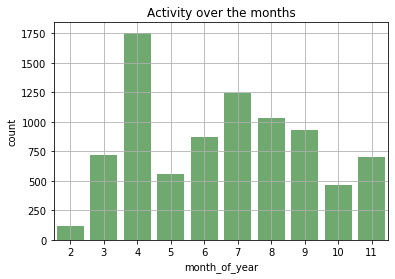

In [10]:
sns.countplot(df.month_of_year, color='green', alpha = 0.6)
plt.title('Activity over the months')
plt.grid()

In [59]:
month_dict = {i:0 for i in range(2,11)}

In [60]:
month_dict

{2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}

In [ ]:
def activity_heatmap(month):
    activity[month] = df[df['month_of_year'] == month]

In [61]:
df.month_of_year.nunique()

10

### Capturing count of texts send by each member

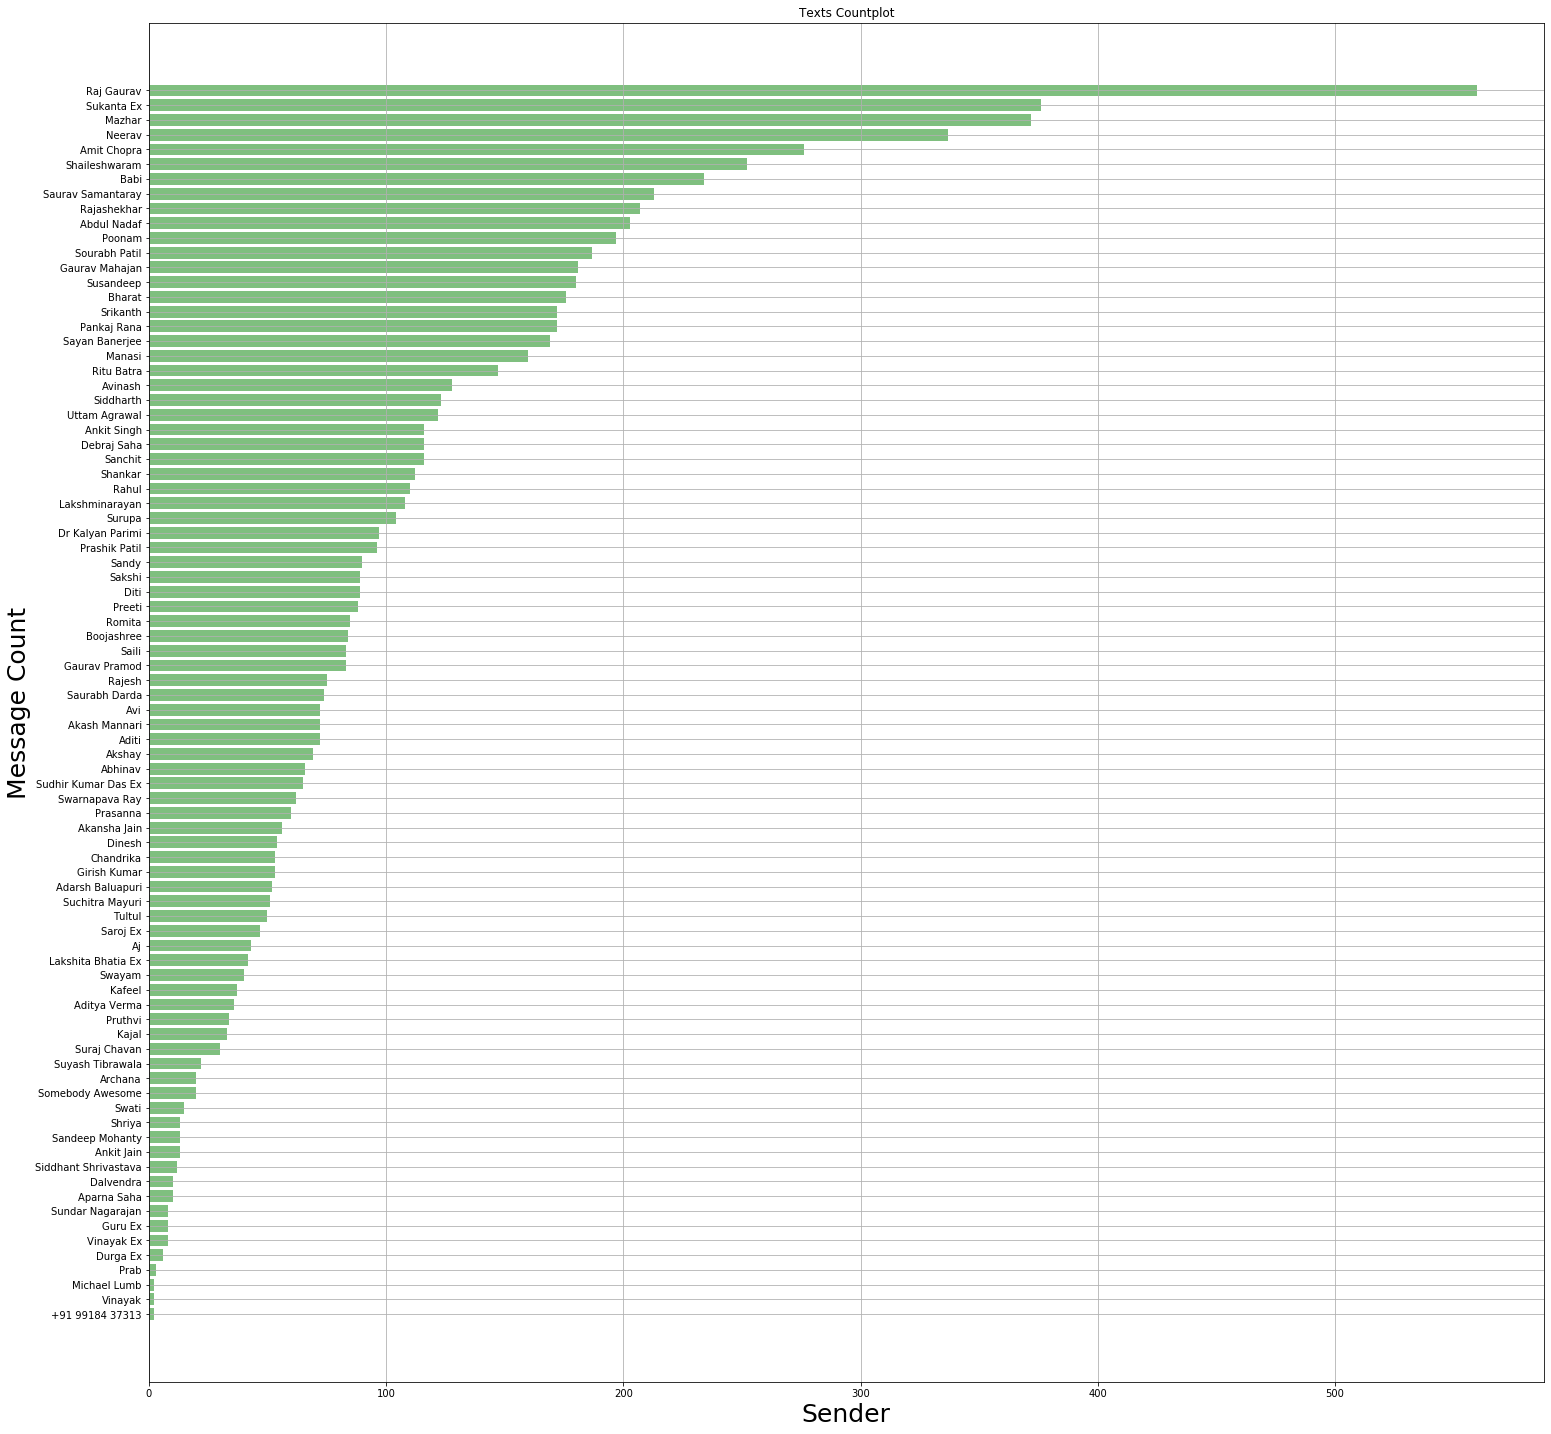

In [91]:
# Create sender counts as a series
sender_count_series = df.groupby(['Sender']).size().sort_values(ascending=True)

# Create sender counts series as a DataFrame
sender_count_df = pd.DataFrame(sender_count_series)

# Reset index in order to name columns correctly
sender_count_df = sender_count_df.reset_index()
sender_count_df.columns = ['Sender', 'count']

# Plot bar chart with sender message counts
plt.figure(figsize=(25, 25))
plt.barh(sender_count_df['Sender'], sender_count_df['count'], color='green', alpha = 0.5)
plt.title('Texts Countplot')
plt.xlabel("Sender", size=25)
plt.ylabel("Message Count", size=25)
plt.xticks(ha="center")
plt.grid(True)
plt.show()

sender_count_df = sender_count_df.sort_values('Sender', ignore_index=True)

In [12]:
text_count = {}
for ind, row in df.iterrows():
    sender = df.loc[ind, 'Sender']
    if sender in text_count:
        text_count[sender] += 1
    else:
        text_count[sender] = 1

Create corpus to hold all text send by individuals

In [13]:
# Dictionary to hold all text sent by individuals
member_text = {}

for sender in df.Sender.unique():
    member_text[sender] = ''
    
for ind, row in df.iterrows():
    text = df.loc[ind, 'Text']
    sender = df.loc[ind, 'Sender']
    member_text[sender] += ' ' + text

In [14]:
# member_text

In [15]:
member_text_df = pd.DataFrame({'Text':member_text})

member_text_df.head()

,Text
+91 99184 37313,Thanks mazhar Sure
Abdul Nadaf,Thank you Morning guys... Can anyone help me... Where in JLC can we fi...
Abhinav,Agreed Right Let's write on the official group in which he messaged ju...
Adarsh Baluapuri,🤝🏻 Facing proble in mysq installation Problem* Thanx Can somebody tell...
Aditi,"In the anaconda navigator, is it the jupyter lab that we need to launc..."


Finding media-(images or gifs) in each message.  
Images appear as **<span><</span>Media omitted></span>**  
Example below:

In [16]:
member_text_df.iloc[8,0][:50]

' <Media omitted> ? Thanks <Media omitted> 👍 Then w'

Import custom function from my module to count media files

In [17]:
# from utils2 import media_count
def media_count(text):
    pattern = '<Media omitted>'
    count = re.findall(pattern, text)
    return(len(count))

df['Media_count'] = df.Text.apply(media_count)
df.head()

,Text,Sender,day_of_week,hour_of_day,month_of_year,Media_count
0,"Mazhar, Susandeep - welcome to students group",Babi,3,14,2,0
1,Hello Everyone,Mazhar,3,14,2,0
2,"Are there any important updates if any, am I missing?",Mazhar,3,14,2,0
3,Hi Babi,Susandeep,3,15,2,0
4,I believe another group is also created for same,Susandeep,3,15,2,0


In [18]:
Media_df = df.groupby(['Sender', 'Media_count']).size().unstack()
Media_df.fillna(0, inplace=True)
Media_df = Media_df.astype('int32')
Media_df['Ratio%'] = round((Media_df[1]/Media_df[0])*100, ndigits=0)
Media_df['Ratio%'] = Media_df['Ratio%'].astype('int16')
Media_df.drop(0, axis = 1, inplace=True)
Media_df.sort_values(1, ascending=True, inplace=True)
Media_df.columns=['Media_count', 'Ratio%media']
Media_df.reset_index(inplace=True)
Media_df = Media_df.sort_values('Sender', ignore_index=True)

In [19]:
count_df = pd.concat([sender_count_df, Media_df], axis=1,join='outer')
count_df = count_df.iloc[:,[0,1,3,4]]

In [20]:
count_df

,Sender,count,Media_count,Ratio%media
0,+91 99184 37313,2,0,0
1,Abdul Nadaf,203,17,9
2,Abhinav,66,7,12
3,Adarsh Baluapuri,52,2,4
4,Aditi,72,7,11
5,Aditya Verma,36,10,38
6,Aj,43,8,23
7,Akansha Jain,56,6,12
8,Akash Mannari,72,5,7
9,Akshay,69,17,33


### Total msgs vs media messages

As seen some people are outliers, one person has has messages with over 90% images

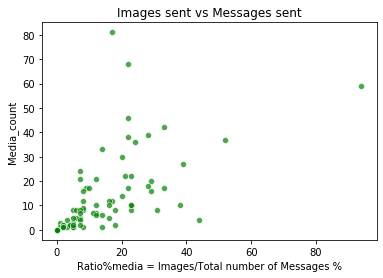

In [21]:
sns.scatterplot(x = 'Ratio%media', y='Media_count', data=Media_df, color='Green', alpha = 0.7)
plt.title('Images sent vs Messages sent')
plt.xlabel('Ratio%media = Images/Total number of Messages %')
plt.show()

### Countplot for media files

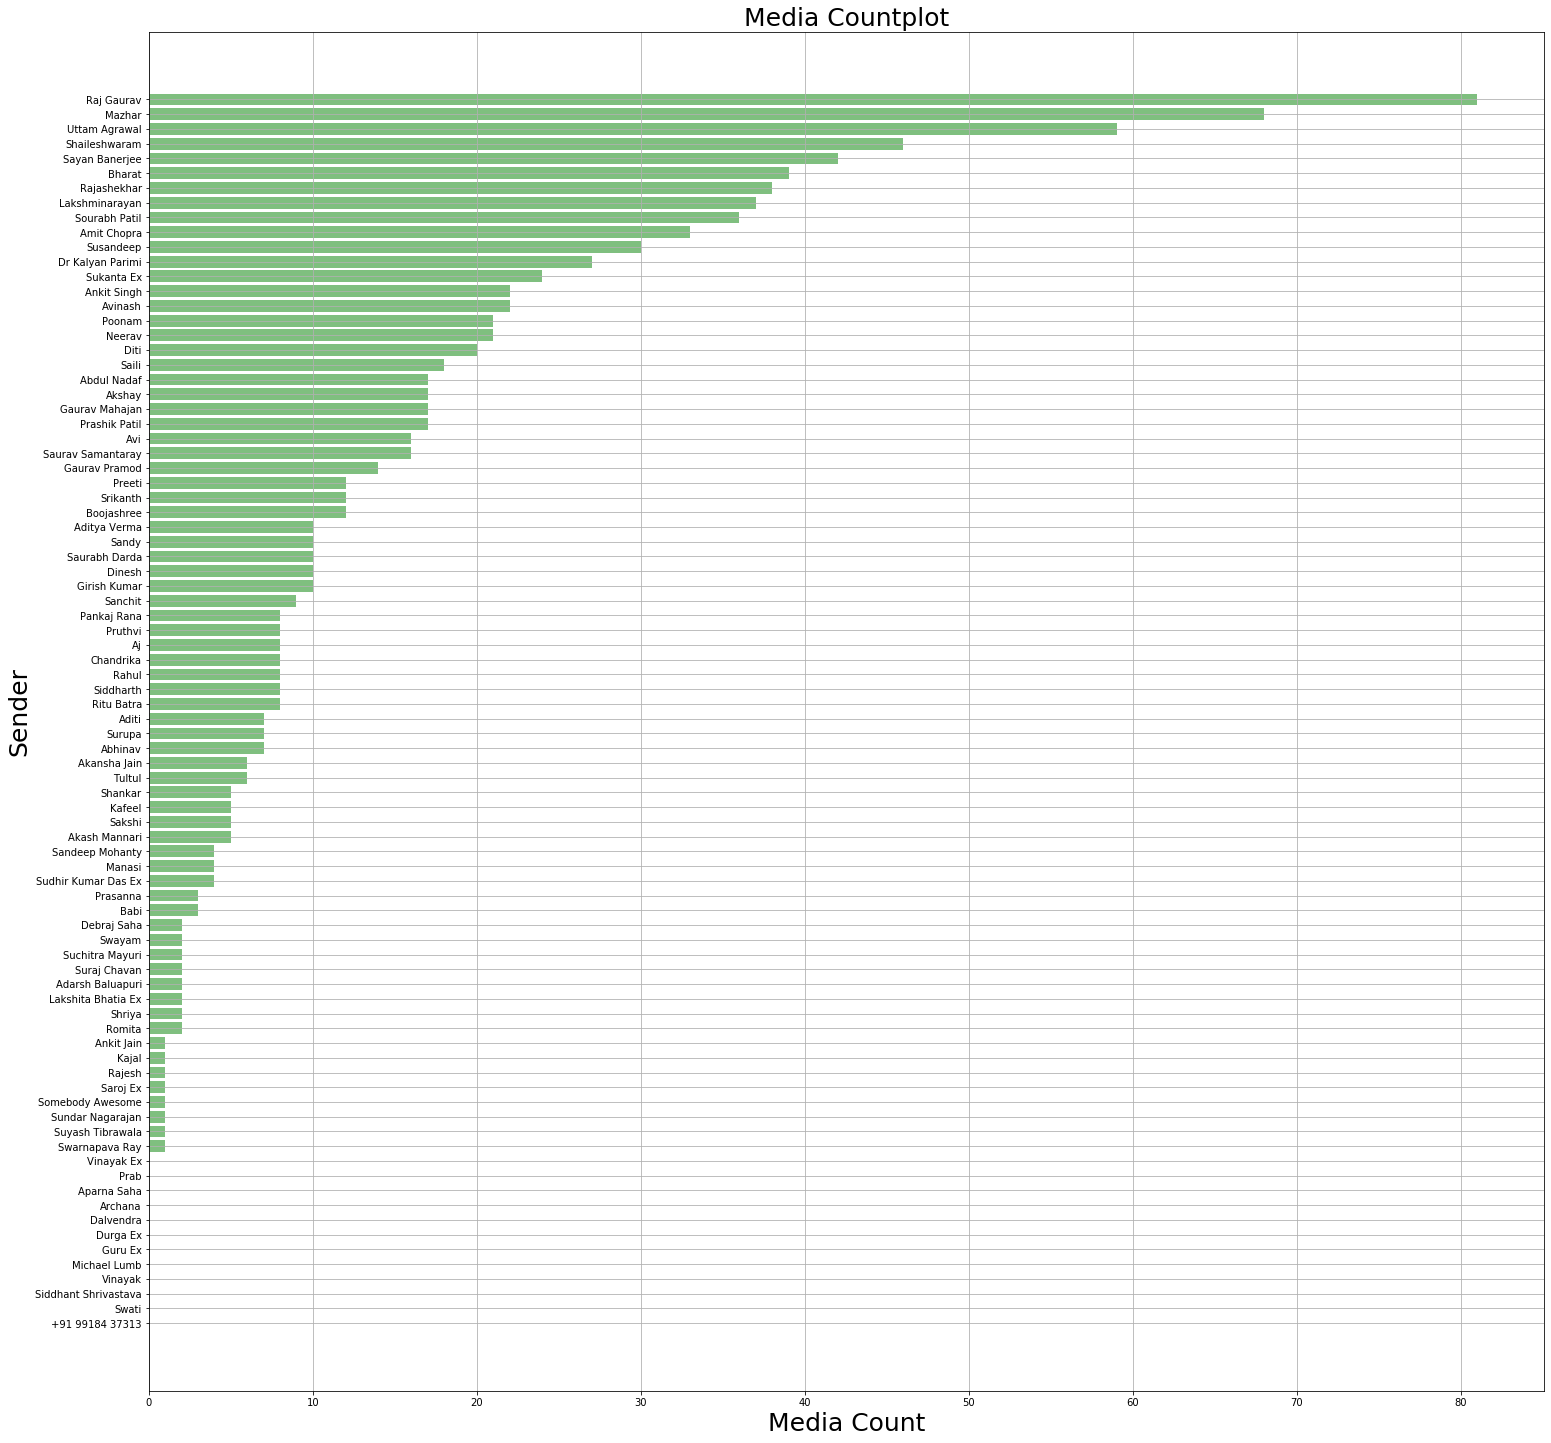

In [90]:
plt.figure(figsize=(25, 25))
plt.barh(Media_df.sort_values('Media_count')['Sender'],
         Media_df.sort_values('Media_count')['Media_count'], color='green', alpha = 0.5)

plt.title('Media Countplot', size=25)
plt.ylabel("Sender", size=25)
plt.xlabel("Media Count", size=25)
plt.xticks(ha="center")
plt.grid(True)
plt.show()

**Plot has incorrect scales**

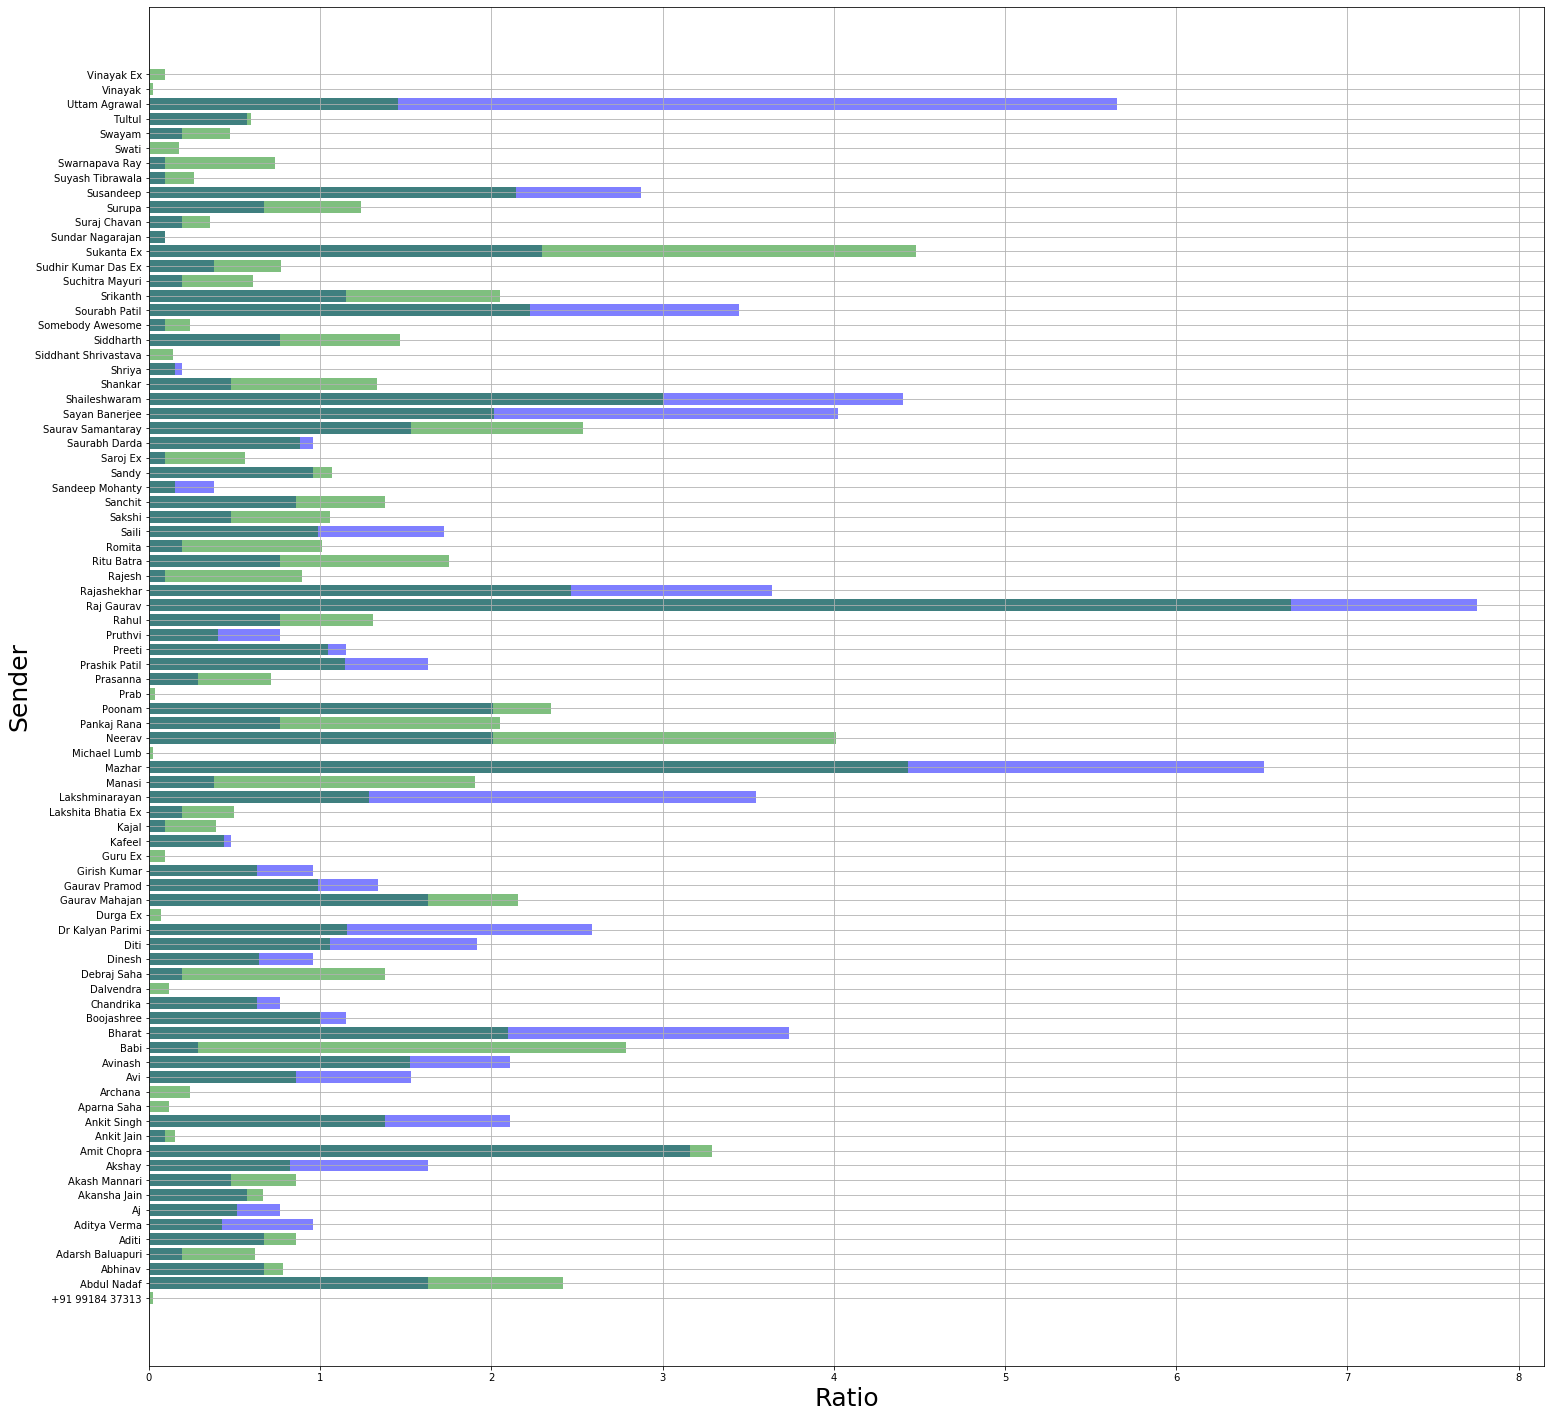

In [89]:
total_msgs = sender_count_df['count'].sum()
total_media = Media_df['Media_count'].sum()
plt.figure(figsize=(25, 25))

plt.barh(Media_df['Sender'], Media_df['Media_count']*100/total_media, color='blue', alpha=0.5)
plt.barh(sender_count_df['Sender'], sender_count_df['count']*100/total_msgs, color='green', alpha=0.5)
plt.ylabel("Sender", size=25)
plt.xlabel("Ratio", size=25)
plt.xticks(ha="center")
plt.grid(True)
plt.show()

In [24]:
count_df

,Sender,count,Media_count,Ratio%media
0,+91 99184 37313,2,0,0
1,Abdul Nadaf,203,17,9
2,Abhinav,66,7,12
3,Adarsh Baluapuri,52,2,4
4,Aditi,72,7,11
5,Aditya Verma,36,10,38
6,Aj,43,8,23
7,Akansha Jain,56,6,12
8,Akash Mannari,72,5,7
9,Akshay,69,17,33


Emoji's sent by people

In [25]:
member_emoji_count={}
for key in member_text:
    member_emoji_count[key] = emoji.emoji_count(member_text[key])

emoji_df = pd.Series(member_emoji_count)
emoji_df = pd.DataFrame(emoji_df)
emoji_df.reset_index(inplace=True)
emoji_df.columns= ['Sender', 'emoji_count']
emoji_df.sort_values('Sender', inplace=True)
emoji_df.reset_index(inplace=True,drop=True)

In [26]:
count_df = pd.concat([count_df, emoji_df['emoji_count']], axis=1,join='outer')
count_df

,Sender,count,Media_count,Ratio%media,emoji_count
0,+91 99184 37313,2,0,0,0
1,Abdul Nadaf,203,17,9,17
2,Abhinav,66,7,12,2
3,Adarsh Baluapuri,52,2,4,9
4,Aditi,72,7,11,23
5,Aditya Verma,36,10,38,3
6,Aj,43,8,23,8
7,Akansha Jain,56,6,12,8
8,Akash Mannari,72,5,7,10
9,Akshay,69,17,33,23


### Emoji Use countplot

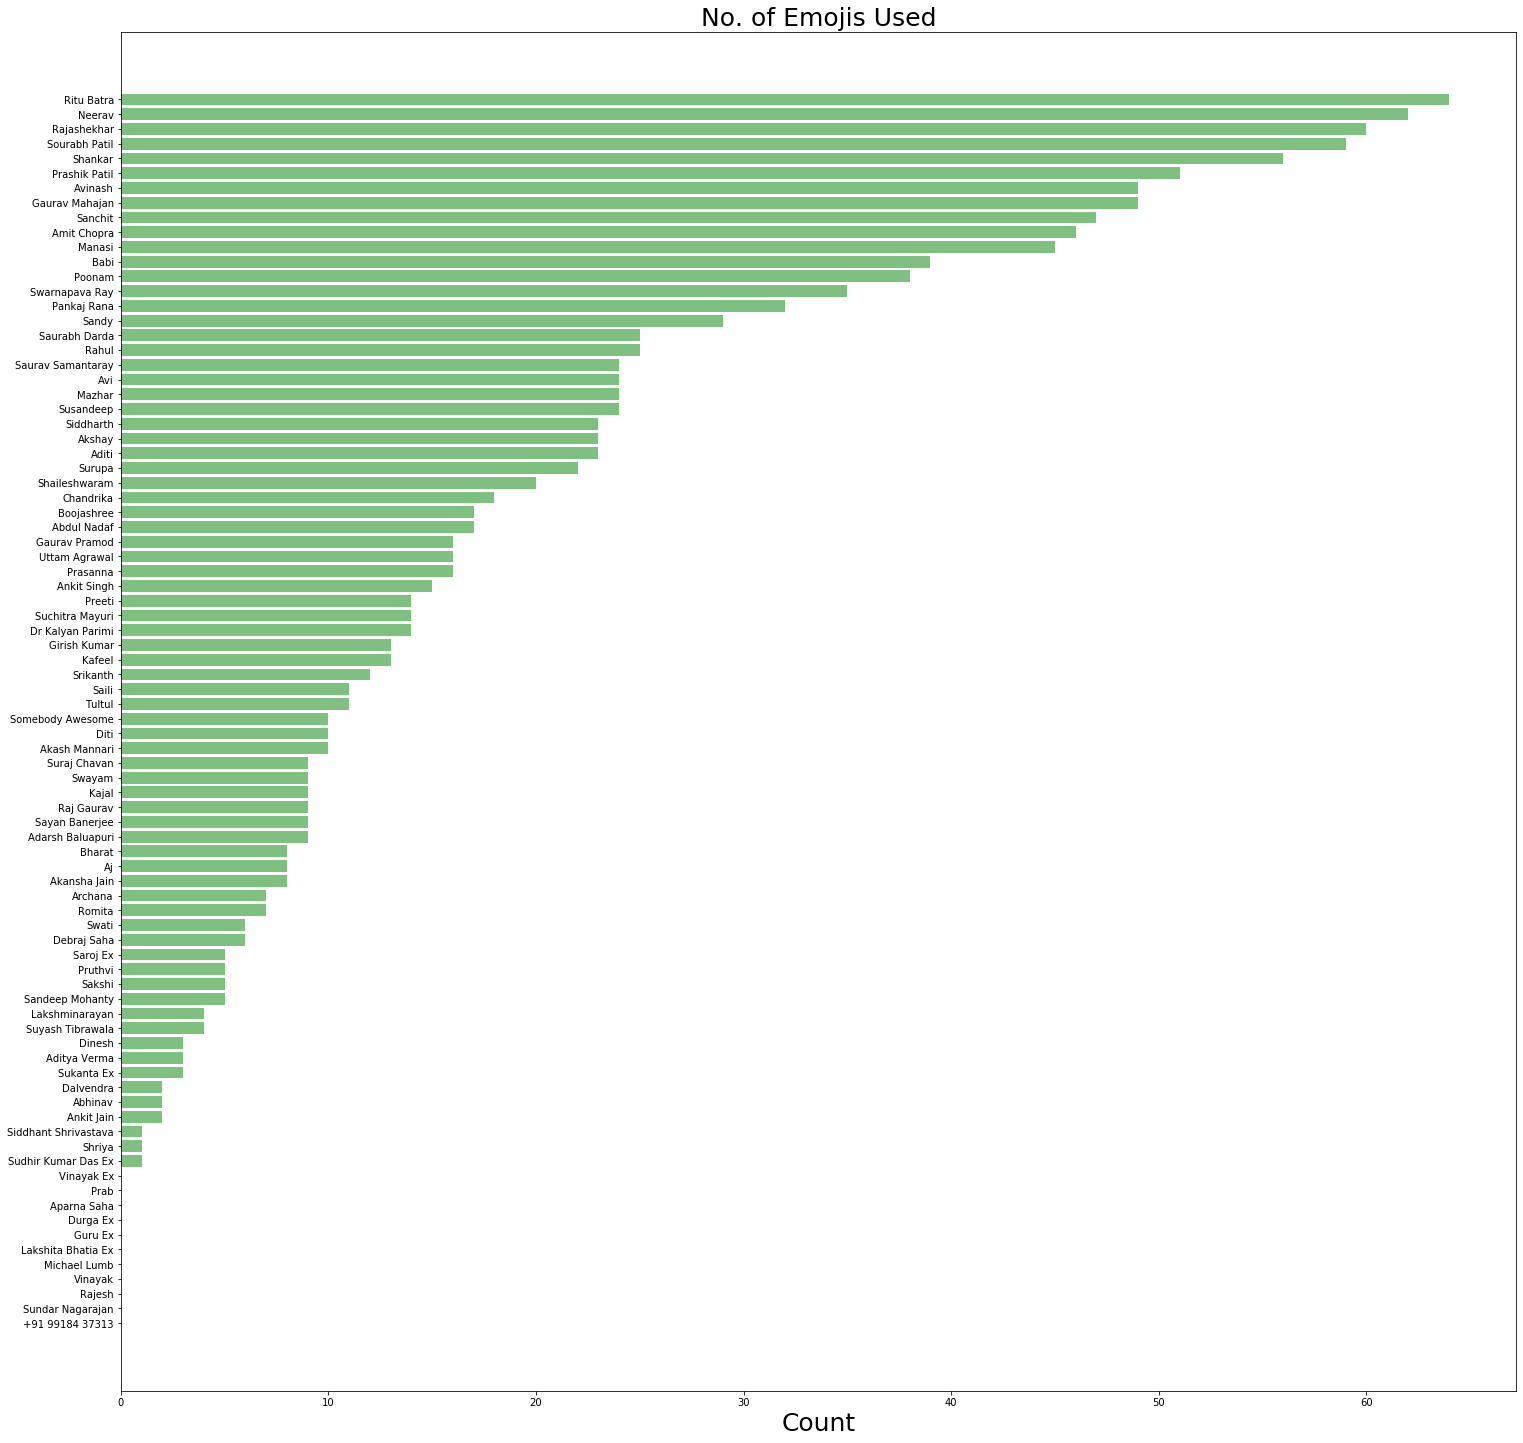

In [88]:
plt.figure(figsize=(25, 25))
plt.barh(count_df.sort_values('emoji_count')['Sender'], count_df.sort_values('emoji_count')['emoji_count'], color='green', alpha=0.5)
plt.title('No. of Emojis Used', size=25)
plt.xlabel('Count', size=25)
plt.show()

In [28]:
def extract_emojis(s):
      return ''.join(c for c in s if c in emoji.UNICODE_EMOJI)

In [29]:
df['Emojis'] = df.Text.apply(extract_emojis)

In [30]:
df.sample(4)

,Text,Sender,day_of_week,hour_of_day,month_of_year,Media_count,Emojis
6407,Optional,Sourabh Patil,5,19,9,0,
7232,Did anyone check the Coursera access today?,Rajashekhar,4,12,10,0,
7172,"yes really, looks like totally unprepared for any questions",Chandrika,6,16,9,0,
2087,C,Saurav Samantaray,7,16,4,0,


In [41]:
member_emoji_use = {}

for key in member_text:
    member_emoji_use[key] = ''
    
for ind, row in df.iterrows():
    member_emoji_use[row['Sender']] += df.loc[ind, 'Emojis']

In [43]:
member_emoji_use

{'Babi': '🙏🙏👍👍👍🙏🙏👍👍👍👍👍🙏🙏👌👌😀🙄💐💐👍👍👍🎉🎂🇮🇳🇮🇳🧐😆😆👍🙏🙏😂✋😂✋',
 'Mazhar': '😇😐😂😦🙊😅🙌🏻😂😂😔✌😦🙏🏻🤩😯😖😂😂🤩😐🤞🏻',
 'Susandeep': '😊👍😭😂😎🖊✅👍🏻😎😕🖊😂😂😀😂😂😊👍🏼😂🌍😀😂',
 'Sudhir Kumar Das Ex': '👍',
 'Srikanth': '👍😶😶😶😴👍🙄😶😕🙄👍🙄',
 'Sukanta Ex': '👍😂😂',
 'Shaileshwaram': '💡😂😊👌🥳😵😵🧐🙄🖐🏻😁🥶😎😎😮😂😁😅🙏',
 'Pankaj Rana': '👆😜🙂😜🤭👍🏻😜😝🙁🎂🎂🎂🎂😜😜👍🏻🙏🏼😊🙏🏼👍🏻🙏🏼😳😡😟🤔😳',
 'Saroj Ex': '👍👍😂😱😂',
 'Bharat': '🍾🍾🤣🤣😴😴😴😴',
 'Gaurav Pramod': '🙂👍🏽☝🏽🙂💐👍🙂🇮🇳🙏🙂😂👍🏽',
 'Manasi': '😊😅😊😐😅😭😐😂😭😂😛😊🤨🤔😐😂😂😂😂🦄🦄🦄😅✨✨✨✨✨😊😂😂🤦🏽♀😂😂😂😂😂😂😂😂😂😂😂',
 'Lakshminarayan': '👍🎂🇮🇳',
 'Vinayak Ex': '',
 'Dinesh': '😜👩🎓',
 'Prashik Patil': '😭👍🏻🤣😂🤣😂😂🙋🏻♂😂🎂🎂🎂🎂🎂💐😂😂😂😂🤣🤣👍🏻👍🏻👌🏻👌🏻😂🤣😂😂🤣🤣🤣🤣🙋🏻♂😂😂🙋🏻♂🙋🏻♂',
 'Ankit Singh': '😶😶😅😅😅😂😥😂🎈😅😅😅😂😋🙁',
 'Suraj Chavan': '👍🤣🤣🤣😄😊👍🤝😛',
 'Amit Chopra': '😊😊🤣😃🤣👍🎉🤣🤣🤣🤣🤣😆👌🎂😂🤣👍👍🤣😆👍👍🤪🤪🎂😊😊😄👍👍👍🇮🇳🇮🇳😂😂😊😂😊😂😄🥃👍😊',
 'Saurav Samantaray': '🤝🏻😊👍🏼👍🏼🤣🤣🤣🤝🏻👏🏻👍🏼👍🏼👍🏼👍🏼👍🏼',
 'Girish Kumar': '👍🏻😂😂😂🥳🎂🥳🎂✌🏻👏🏻',
 'Sundar Nagarajan': '',
 'Preeti': '👍👍👍😀😀👏👏🤣😳😳😭😀👍👏',
 'Archana': '👍🎂💐👍👏👏👏',
 'Sandy': '😀😀😀😀👍😀😀😀😀😀😀😀👍😀😀😀😀😀👍😀😀😄😄😄🤣🤣🤣👍👍',
 'Romita': '😅😅🙌😂😂😊😊',
 'Debraj Saha': '😂😂😂😂😂😂',
 'Ankit Jain': '😂😁',
 'Rahul':

In [54]:
# member_unique_emojis

In [49]:
count_df['emoji_unique'] = 0
for ind, row in count_df[1:].iterrows():
    emojis = member_emoji_use[row['Sender']]
    count_df.loc[ind, 'emoji_unique'] = len(set(emojis))

In [53]:
count_df.head()

,Sender,count,Media_count,Ratio%media,emoji_count,emoji_unique
0,+91 99184 37313,2,0,0,0,0
1,Abdul Nadaf,203,17,9,17,12
2,Abhinav,66,7,12,2,2
3,Adarsh Baluapuri,52,2,4,9,7
4,Aditi,72,7,11,23,8


### Unique Emojis Used Countplot

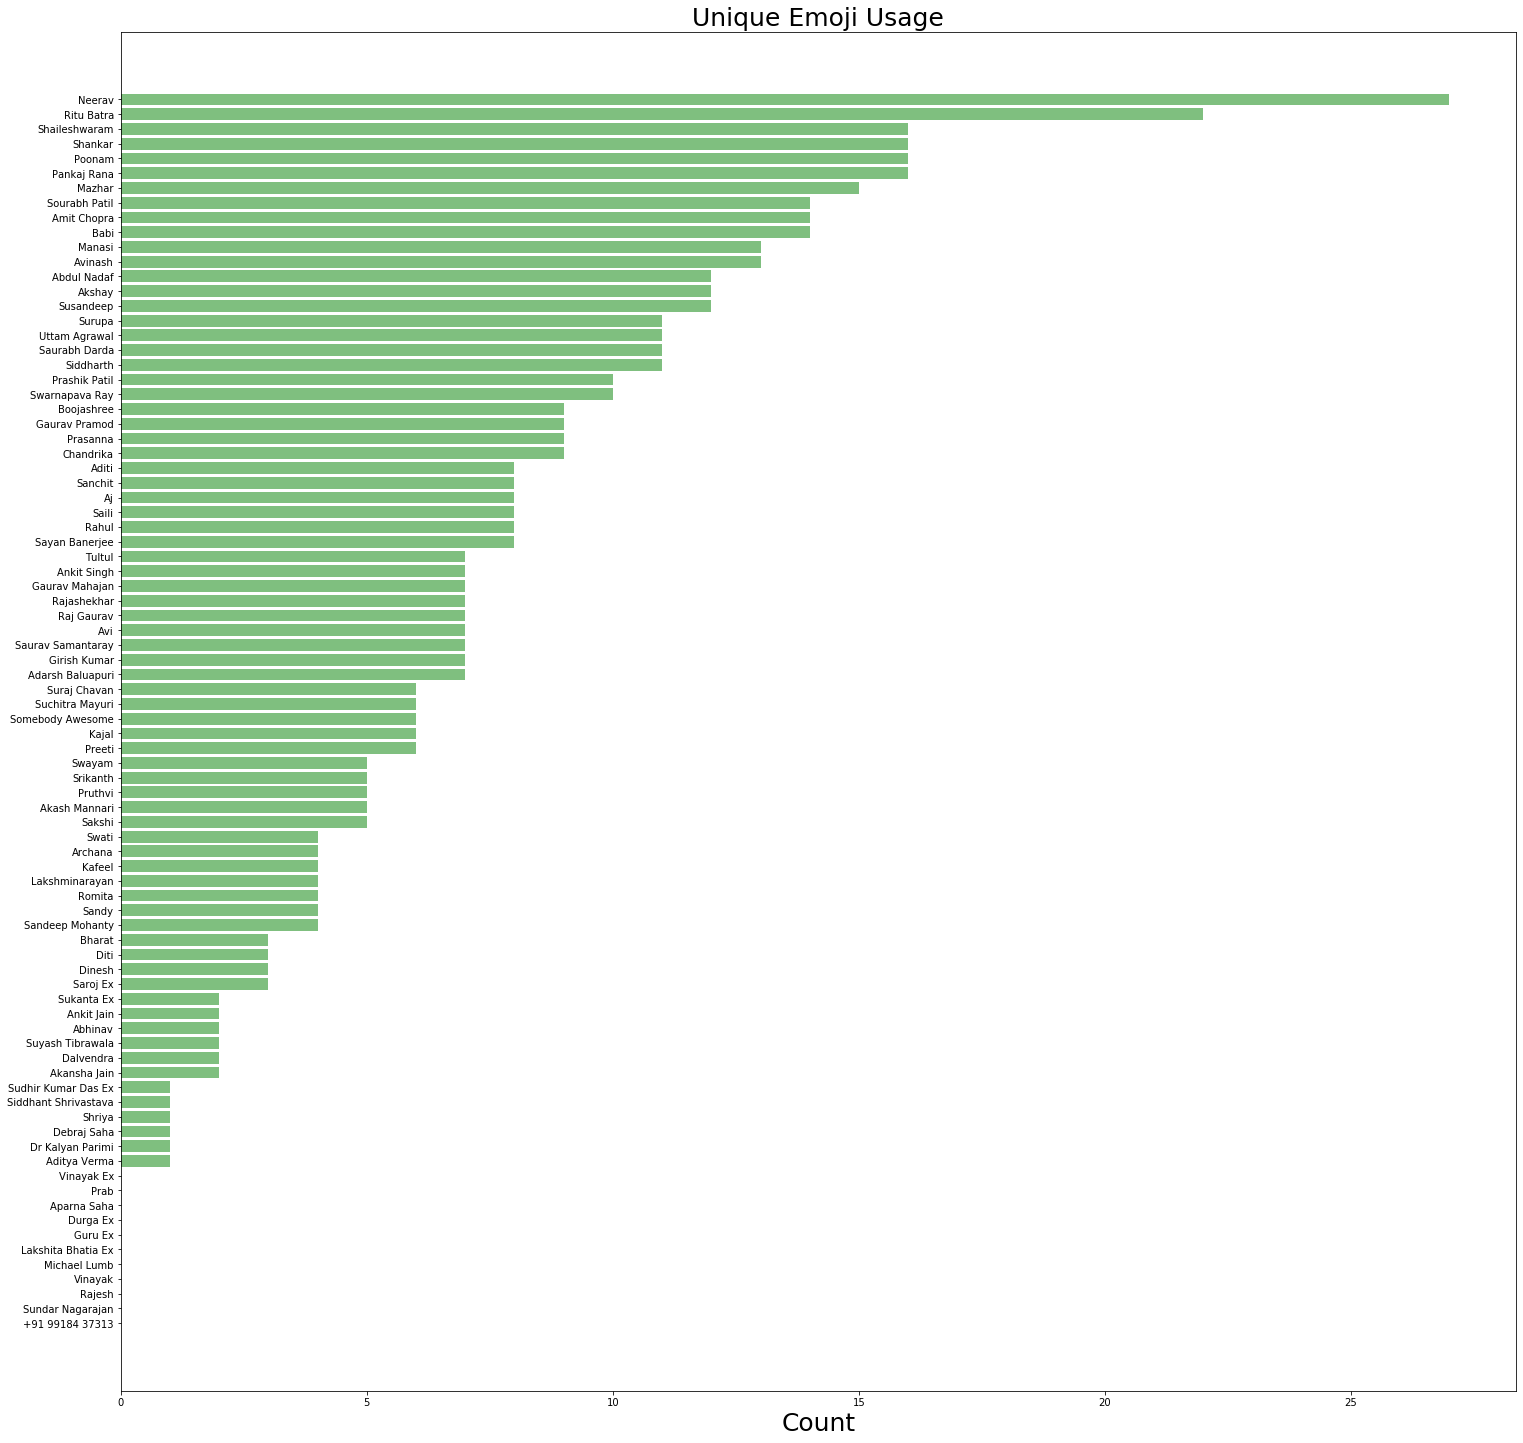

In [94]:
plt.figure(figsize=(25, 25))
plt.barh(count_df.sort_values('emoji_unique')['Sender'],
         count_df.sort_values('emoji_unique')['emoji_unique'], color='green', alpha=0.5)
plt.title("Unique Emoji Usage", size=25)
plt.xlabel('Count', size=25)
plt.show()

### Unique vs Total Emojis Sent

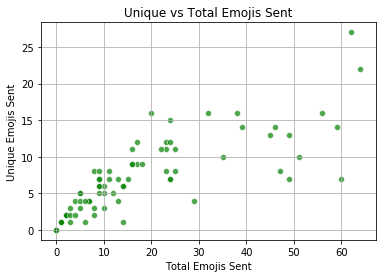

In [98]:
sns.scatterplot(x = 'emoji_count', y='emoji_unique', data=count_df, color='Green', alpha = 0.7)
plt.title('Unique vs Total Emojis Sent')
plt.xlabel('Total Emojis Sent')
plt.ylabel('Unique Emojis Sent')
plt.grid()
plt.show()

In [100]:
count_df.emoji_count.sum()

1415

In [108]:
corpus = ''
for ind, row in df.iterrows():
    text = row['Text'] + " "
    corpus += text

corpus = corpus.lower()
print(f'Total words in corpus: {len(corpus)}')

Total words in corpus: 290812


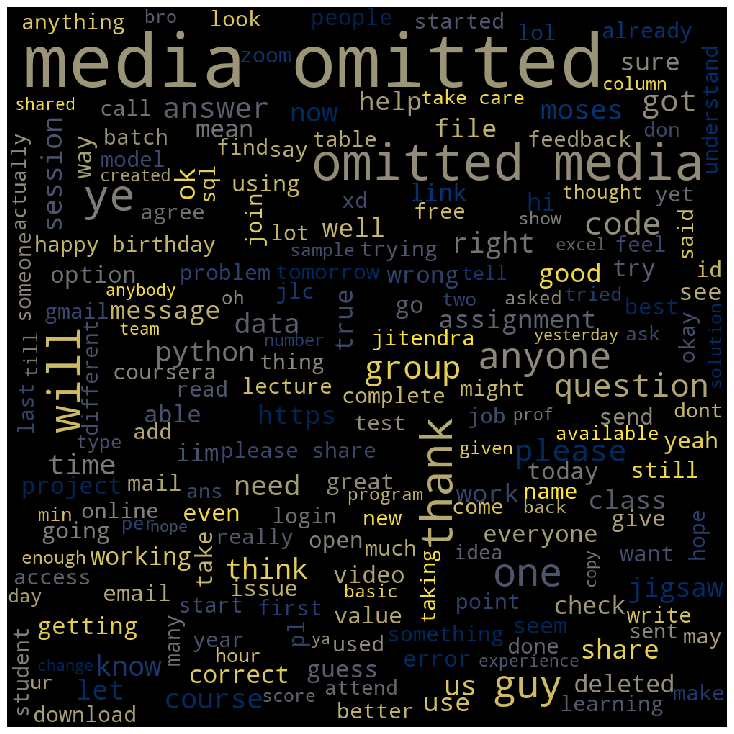

In [109]:
from wordcloud import WordCloud, STOPWORDS 

wordcloud = WordCloud(width = 1000, height = 1000,
                      background_color ='black',
                      contour_color='white',
                      contour_width = 5,
                      stopwords = STOPWORDS,
                      min_font_size = 15,
                      colormap = 'cividis'
                     ).generate(corpus) 

# plot the WordCloud image                        
plt.figure(figsize = (10, 10)) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.imshow(wordcloud)
plt.show()